In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# читаем данные в дадафрейм библиотеки pandas

df = pd.read_csv('C:/Netology/Machine Learning/Lecture_2/adult.csv', na_values='?')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
# смотрим описание данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# доля пропусков, проверяем на пропуски

df.isna().mean()

age                0.000000
workclass          0.057307
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.057512
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017546
income             0.000000
dtype: float64

In [7]:
print('Для height пустых строк {}'.format( len( df[ pd.isnull( df['workclass'] ) ] ) ))
print('Для weight пустых строк {}'.format( len( df[ pd.isnull( df['occupation'] ) ] ) ))
print('Для sport пустых строк {}'.format( len( df[ pd.isnull( df['native-country'] ) ] ) ))
print('Всего строк в наборе {}'.format( len( df ) ))

Для height пустых строк 2799
Для weight пустых строк 2809
Для sport пустых строк 857
Всего строк в наборе 48842


In [8]:
# обнуляем ячейки с отсутствием данных
df = df[ pd.isnull( df['workclass'] ) == 0 ]
df = df[ pd.isnull( df['occupation'] ) == 0 ]
df = df[ pd.isnull( df['native-country'] ) == 0 ]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [10]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [11]:
# целевая переменная (столбец sex) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
le.fit( df['income'] )

LabelEncoder()

In [13]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [14]:
# пример "расшировки" столбца income

le.transform( [ '<=50K', '>50K', '<=50K' ] )

array([0, 1, 0], dtype=int64)

In [15]:
# записываем в переменную y преобразованный столбец income

Y = pd.Series( data = le.transform( df['income'] ) )
Y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

In [16]:
# будем использовать набор данных в качестве признаков Х
X = pd.get_dummies(df.loc[:, ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']])

In [17]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
X

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Логистическая модель

In [19]:
# разделяем выборку на тренировочную и тестовую

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [20]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [24]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score


accuracy_score(y_test, model.predict(X_test))

0.8500036854131348

Итак, у yас точность классификации 85%, который будем считать выше ожидаемого, но не отличный, нам есть к чему стремится и следует улучшать модель.

In [25]:
model.score(X,  Y)

0.8486135067002786

## Оценка качества логистической модели

Считаем accuracy последней модели

In [26]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [27]:
pred = model.predict(X_test)

In [28]:
tp, fp, fn, tn

(2023, 732, 1303, 9509)

In [29]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.8500036854131348

In [30]:
precision = tp / (tp + fp)
precision

0.7343012704174229

In [31]:
recall = tp / (tp + fn)
recall

0.6082381238725195

In [32]:
from sklearn.metrics import recall_score, precision_score

In [33]:
recall_score(y_test, pred)

0.6082381238725195

In [34]:
precision_score(y_test, pred)

0.7343012704174229

### ROC

In [35]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [36]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [37]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9999999999999991)
(0.0, 0.0006013229104028864, 0.9999999999999991)
(0.0, 0.0012026458208057728, 0.9999999999999984)
(0.0, 0.0024052916416115455, 0.9999999999999978)
(0.0, 0.0027059530968129887, 0.9999999999999976)
(0.0, 0.0036079374624173183, 0.9999999999999973)
(0.0, 0.004810583283223091, 0.9999999999999971)
(0.0, 0.005411906193625977, 0.9999999999999969)
(0.0, 0.006313890559230307, 0.9999999999999967)
(0.0, 0.006915213469633193, 0.9999999999999964)


In [38]:
import  matplotlib.pyplot as plt

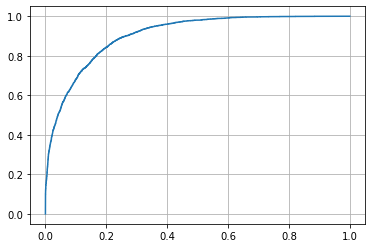

In [39]:
plt.plot( fpr, tpr )
plt.grid()

In [40]:
results = {}

In [41]:
penalty = 'l1'
for c in np.logspace(-3, 3, 7):
    model = make_pipeline(StandardScaler(), LogisticRegression(penalty=penalty, C=c, solver='liblinear'))
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    results[(penalty, c)] = y_prob

In [42]:
penalty = 'l2'
for c in np.logspace(-3, 3, 7):
    model = make_pipeline(StandardScaler(), LogisticRegression(penalty=penalty, C=c, solver='liblinear'))
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    results[(penalty, c)] = y_prob

Построим ROC AUC

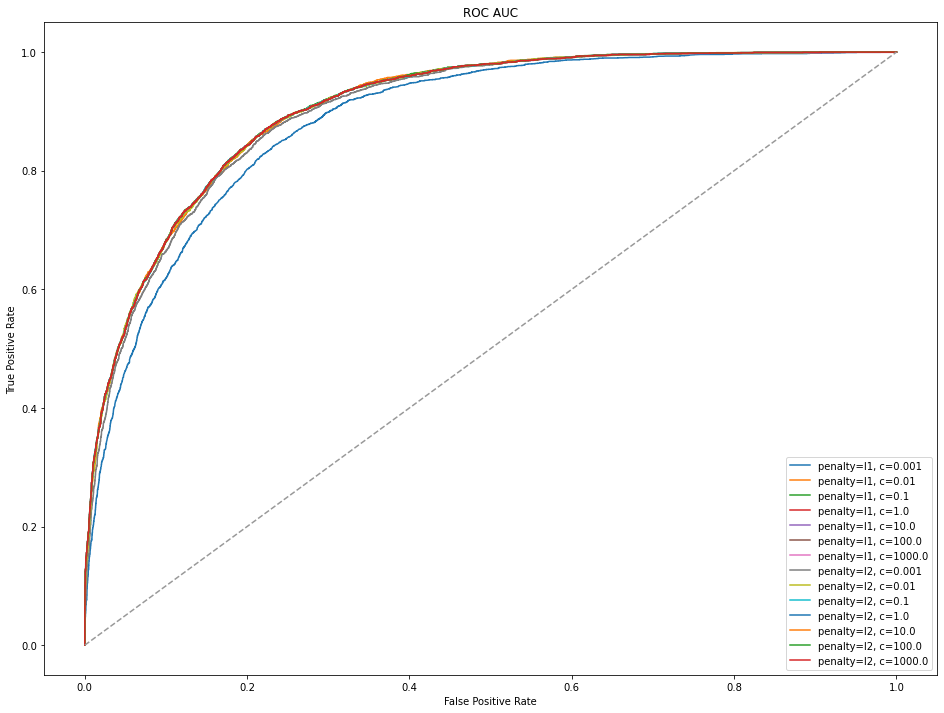

In [43]:
plt.figure(figsize=(16, 12))
for (penalty, c), proba in results.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'penalty={penalty}, c={c}')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.legend(loc='lower right')
plt.show()

Построим Precision-Recall 


In [44]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

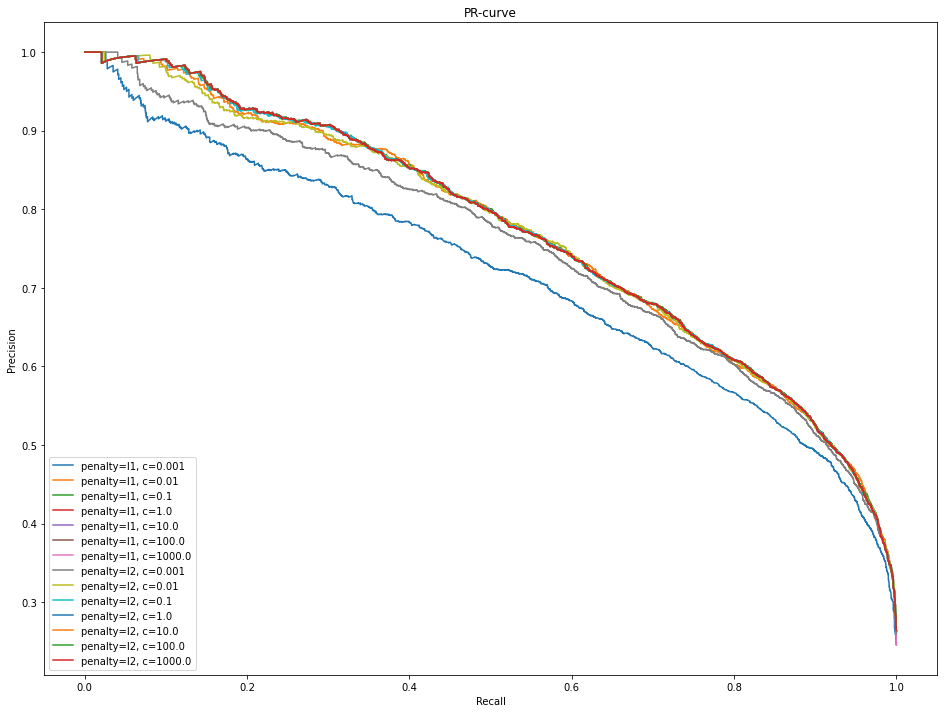

In [45]:
plt.figure(figsize=(16, 12))
for (penalty, c), proba in results.items():
    precision, recall, _ = precision_recall_curve(y_test, proba)
    plt.plot(recall, precision, label=f'penalty={penalty}, c={c}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve')
plt.legend(loc='lower left')
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

In [47]:
predictions = model.predict_proba(X_test)

In [48]:
roc_auc_score( y_test, predictions[:, 1] )

0.9054151385758364

In [49]:
from sklearn.metrics import auc

In [50]:
auc( fpr, tpr )

0.9054151385758364

In [51]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [52]:
pr.shape, thres.shape

((12578,), (12577,))

In [53]:
# посмотрим что получилось
for line in zip( pr[:10], re[:10], thres[:10] ):
    print( line )

(0.2639054193446005, 1.0, 0.0031835891923049824)
(0.26384700841136327, 0.9996993385447985, 0.0031876554172001813)
(0.26386794698833427, 0.9996993385447985, 0.003190856475087226)
(0.2638888888888889, 0.9996993385447985, 0.003194990816210473)
(0.2639098341138186, 0.9996993385447985, 0.0032039552675546604)
(0.2639307826639149, 0.9996993385447985, 0.0032066732320996227)
(0.26395173453996984, 0.9996993385447985, 0.003217519258088156)
(0.2639726897427755, 0.9996993385447985, 0.003219208402202857)
(0.26399364827312427, 0.9996993385447985, 0.0032194967555893537)
(0.2640146101318088, 0.9996993385447985, 0.0032211646025726553)


(0.0, 1.0)

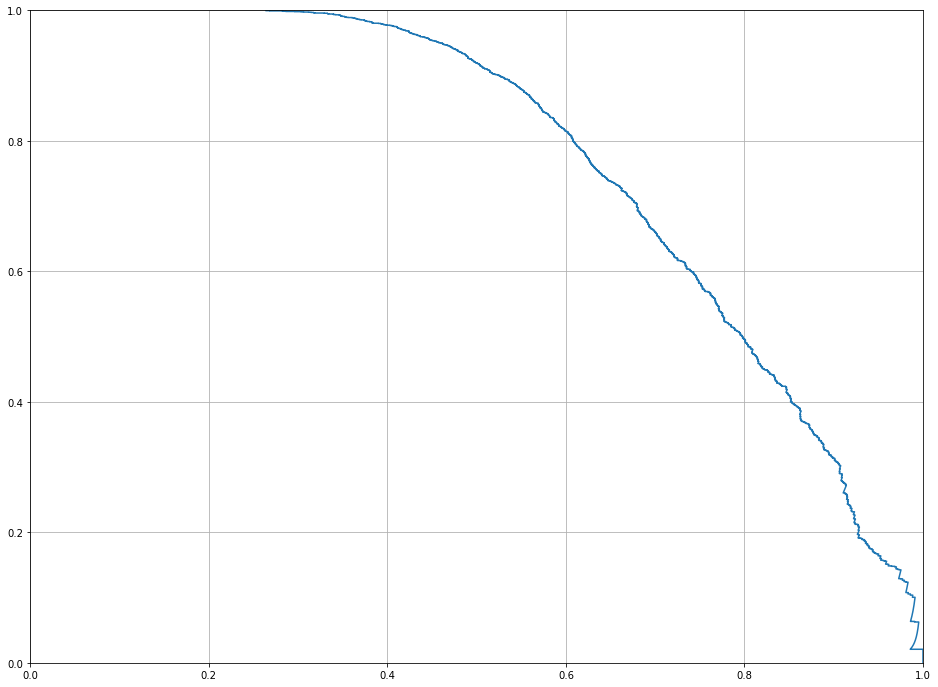

In [54]:
plt.figure(figsize=(16, 12))
plt.plot(pr,re)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [55]:
from sklearn.metrics import average_precision_score

In [56]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.7709120550686821

### Пример влияния L1 и L2-регуляризации

In [57]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, y_train )
predictions = model1.predict_proba( X_test )

In [58]:
model2 = LogisticRegression( penalty = 'l2', C = 0.1, solver='liblinear' ).fit( X_train, y_train )
predictions2 = model2.predict_proba( X_test )

In [59]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, y_train )
predictions3 = model3.predict_proba( X_test )

In [60]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( y_test, predictions3[:, 1] )

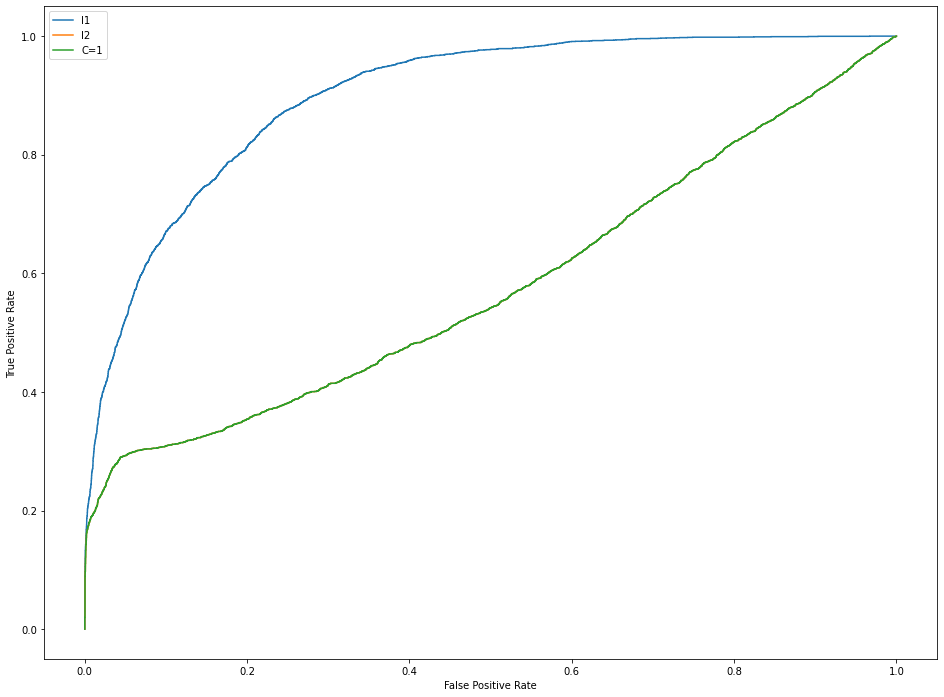

In [61]:
plt.figure(figsize=(16, 12))
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

Ссылка на документацию:

https://scikit-learn.org/stable/modules/svm.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html  